In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\My Projects\Deep Learning concepts\homeprices_banglore.csv")
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

xc = preprocessing.MinMaxScaler()
yc = preprocessing.MinMaxScaler()

scaled_x = xc.fit_transform(data.drop('price',axis='columns'))
scaled_y = yc.fit_transform(data.price.values.reshape(data.shape[0],1))

In [5]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [18]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    features_count = X.shape[1]
    w = np.ones(shape=features_count)
    b = 0
    total_samples = X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T) + b
        
        w_new = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_new = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate*w_new
        b = b - learning_rate*b_new
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
        
        
    
    

In [19]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

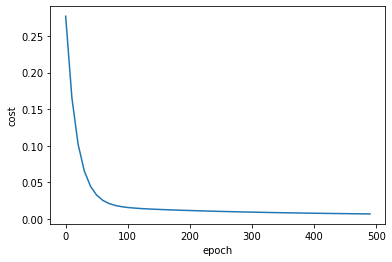

In [20]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [23]:
def predict(area,bedrooms,w,b):
    
    scaled_x = xc.transform([[area,bedrooms]])[0]
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b

    return yc.inverse_transform([[scaled_price]])[0][0]

In [24]:
predict(2400,2,w,b)

76.33811428436599

In [25]:
# Implement Stochastic GD

In [26]:
import random

In [33]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    features_count = X.shape[1]
    w = np.ones(shape=features_count)
    b = 0
    total_samples = X.shape[0]
    
    cost_list_sgd=[]
    epoch_list_sgd=[]
    
    for i in range(epochs):
        random_idx = random.randint(0,total_samples-1)
        x_rand = X[random_idx]
        y_rand = y_true[random_idx]
        y_predicted = np.dot(w,x_rand.T) + b
        
        w_new = -(2/total_samples)*(x_rand.T.dot(y_rand-y_predicted))
        b_new = -(2/total_samples)*np.sum(y_rand-y_predicted)
        
        w = w - learning_rate*w_new
        b = b - learning_rate*b_new
        
        cost = np.mean(np.square(y_rand-y_predicted))
        
        
        if i%10==0:
            cost_list_sgd.append(cost)
            epoch_list_sgd.append(i)
        
    return w, b, cost, cost_list_sgd, epoch_list_sgd

In [34]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71039279, 0.67628159]), -0.23316091299981367, 0.00623293590272128)

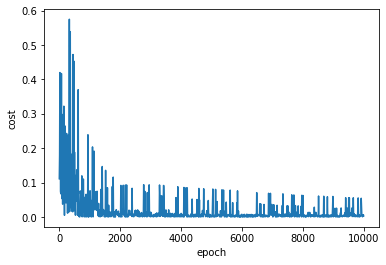

In [35]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)